STUDENT PERFORMANCE INDICATOR

ML Project steps

#Problem Statement

#Data Collection

#Data Preparation 

       EDA(Learning about data)

       Data(Preparing your data to be modelled)

       Data Splitting(Train,Test,Validation)

#Train model on Data

       Choose Algorithm
       Overfit model
       Reduce Overfit with regularization
   
#Evaluate Model

       Classification-Accuracy,Precision,Recall,F1,Confusion Matrix,Mean Average Precision.
       Regression - MSE,MAE,R^2
       Feature Importance
       comparing with other models
       Bias variance

#Deploying model

#Retrain model with updated data



Problem Statement : This project understand student performance(Test Score) is effected by other variables such as gender,Ethnicity,Parental level of education,Lunch and Test preparation

DATA COLLECTION
       
Data Source = https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/




DATA PREPARATION

In [46]:
#install required libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [47]:
#import the CVS data as pandas dataframe
df = pd.read_csv("data/StudentsPerformance.csv")

EDA

In [48]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [50]:
df.shape

(1000, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [52]:
df.rename(columns={'parental level of education': 'parental_level_of_education',
                   'test preparation course': 'test_preparation_course',
                   'math score': 'math_score',
                   'reading score': 'reading_score',
                   'writing score': 'writing_score',
                   'race/ethnicity':'race_ethnicity'}, inplace=True)

In [53]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [54]:
columns_of_interest = ['race_ethnicity', 'parental_level_of_education', 'gender', 'test_preparation_course','lunch']
unique_values = df[columns_of_interest].apply(lambda x: x.unique())
print(unique_values)

race_ethnicity                     [group B, group C, group A, group D, group E]
parental_level_of_education    [bachelor's degree, some college, master's deg...
gender                                                            [female, male]
test_preparation_course                                        [none, completed]
lunch                                                   [standard, free/reduced]
dtype: object


In [55]:
no_unique_values = df[columns_of_interest].apply(lambda x: x.nunique())
print(no_unique_values)

race_ethnicity                 5
parental_level_of_education    6
gender                         2
test_preparation_course        2
lunch                          2
dtype: int64


In [56]:
#checking null values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

we cannot find the missing values

In [57]:
#checking the duplicates values
df.duplicated().sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [59]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [60]:
#finding numerical and categorial values
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features),categorical_features))


we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [62]:
#Adding new columns for "Total Score" and "Avaerage"
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [63]:
reading_full = df[df['reading_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths:{math_full}')
print(f'Number of students with full marks in Reading:{reading_full}')
print(f'Number of students with full marks in writing:{writing_full}')

Number of students with full marks in Maths:7
Number of students with full marks in Reading:17
Number of students with full marks in writing:14


In [64]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students less than 20 marks in Maths:{math_less_20}')
print(f'Number of students less than 20 marks in reading:{reading_less_20}')
print(f'Number of students less than 20 marks in writing:{writing_less_20}')

Number of students less than 20 marks in Maths:4
Number of students less than 20 marks in reading:1
Number of students less than 20 marks in writing:3


Exploring data 

In [66]:
import matplotlib.pyplot as plt

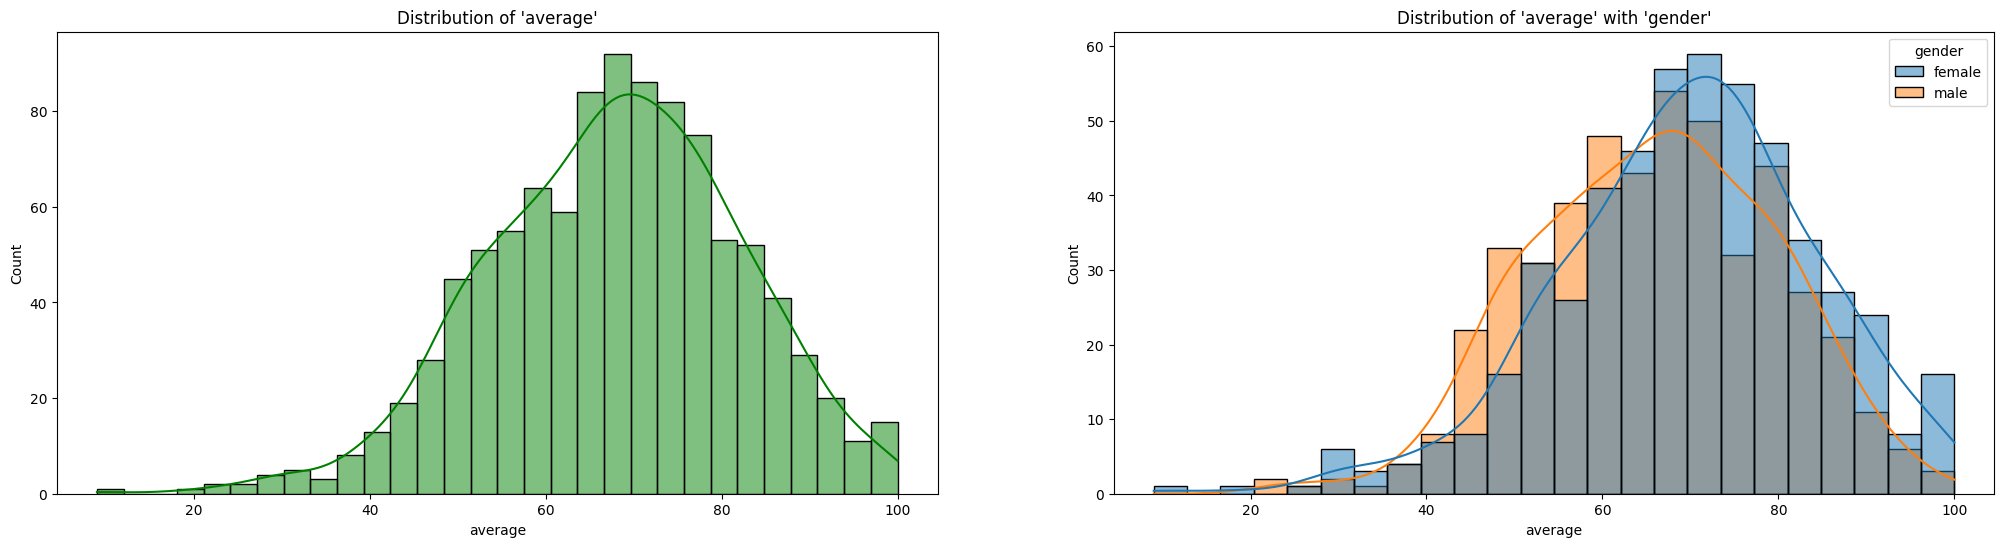

In [87]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 6))

# Subplot 1
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.title("Distribution of 'average'")

# Subplot 2
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.title("Distribution of 'average' with 'gender'")

# Show the plot
plt.show()

from these we can say female students performing will compared to male students

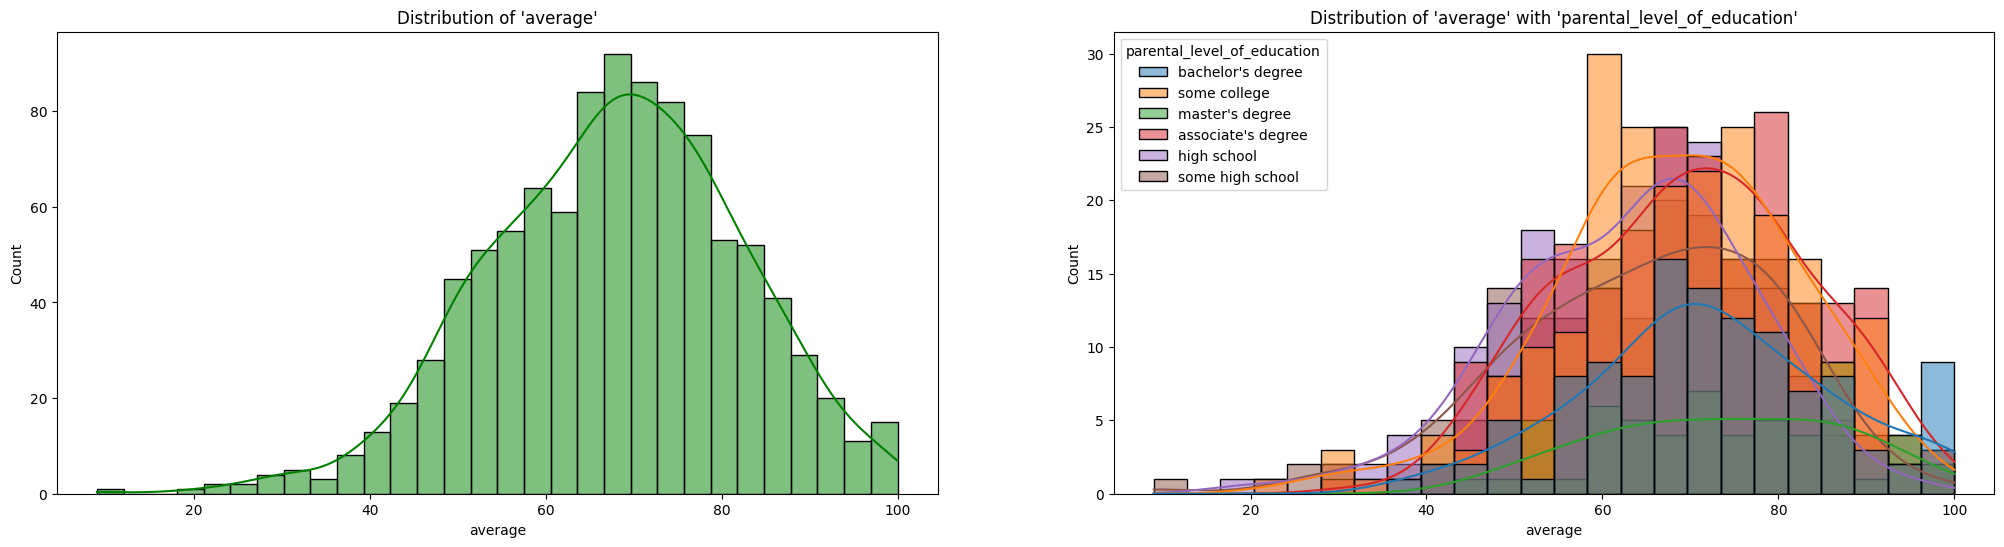

In [86]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 6))

# Subplot 1
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.title("Distribution of 'average'")

# Subplot 2
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title("Distribution of 'average' with 'parental_level_of_education'")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution for Females')

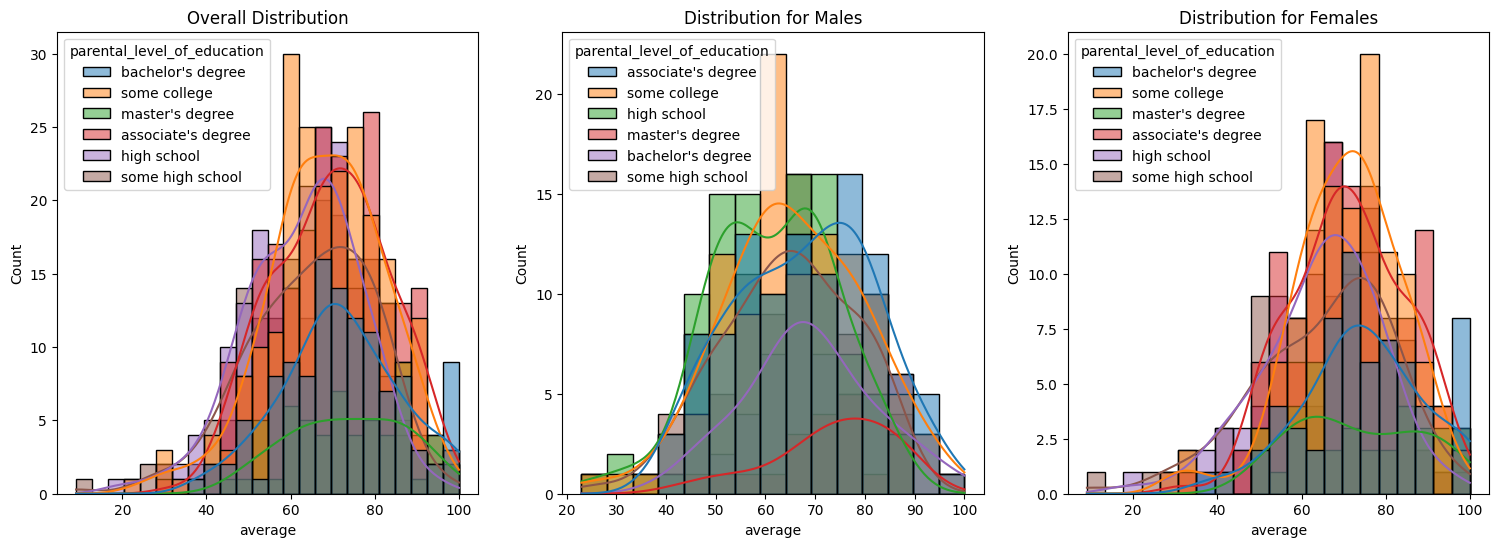

In [82]:
# Create subplots
plt.subplots(1, 3, figsize=(25, 6))

# Subplot 1
plt.subplot(141)
ax1 = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title("Overall Distribution")

# Subplot 2
plt.subplot(142)
ax2 = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Distribution for Males")

# Subplot 3
plt.subplot(143)
ax3 = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Distribution for Females")

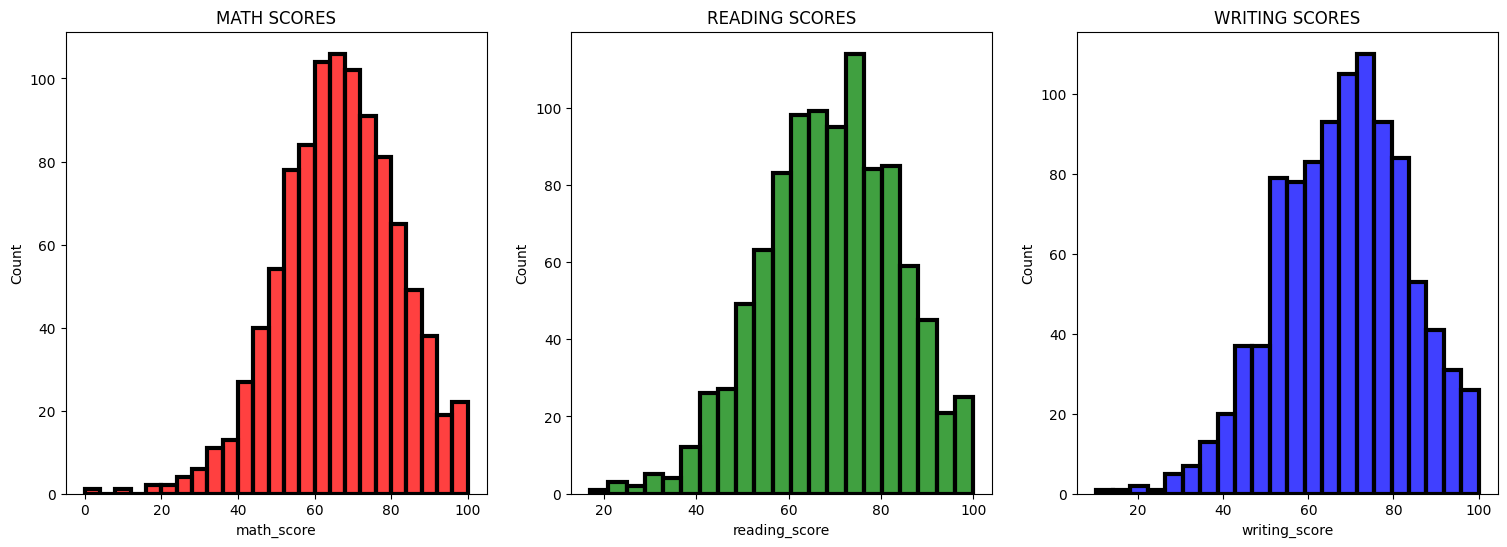

In [95]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.histplot(x='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.histplot(x='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.histplot(x='writing_score',data=df,color='blue',linewidth=3)
plt.show()

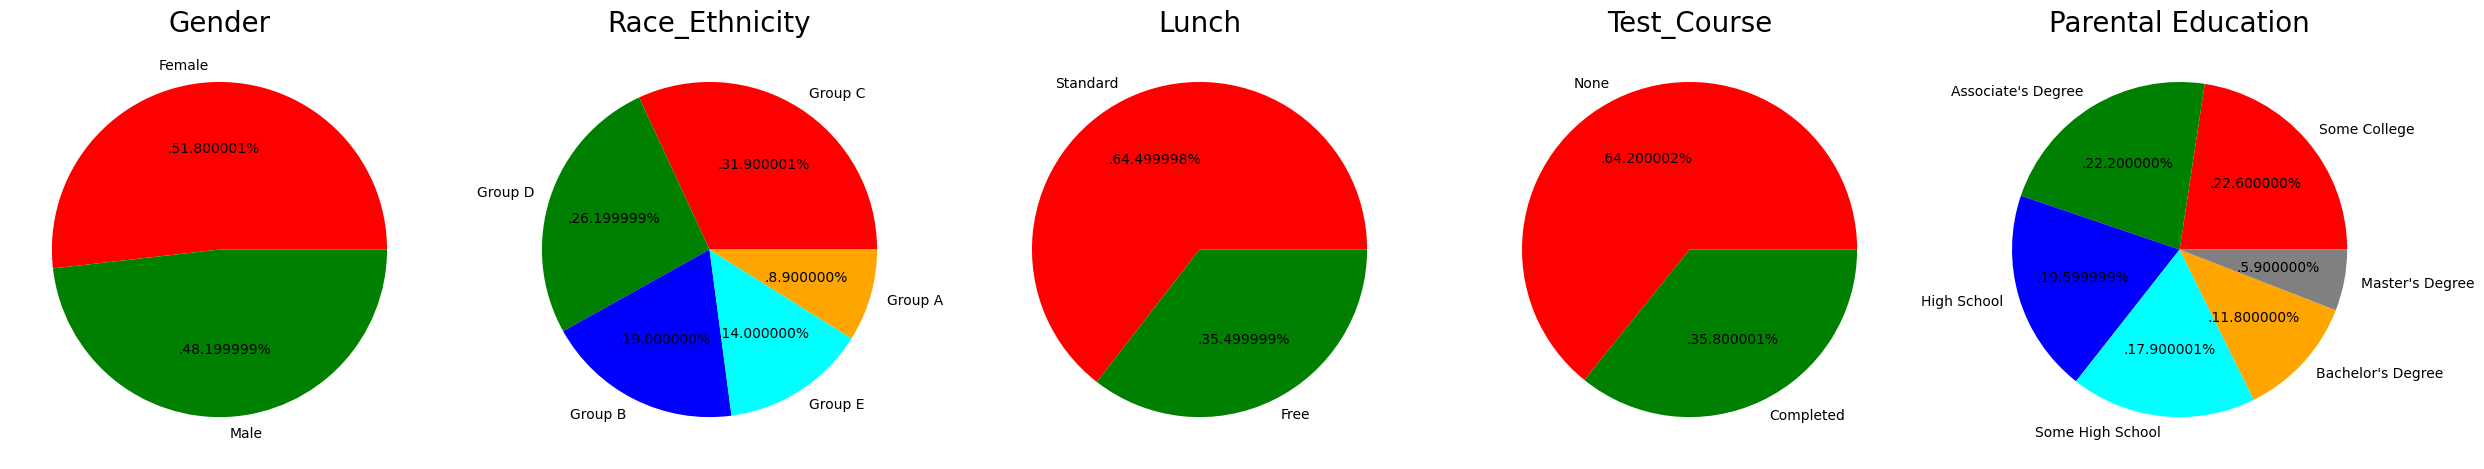

In [107]:

plt.subplots(1, 5, figsize=(25, 10))

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [117]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


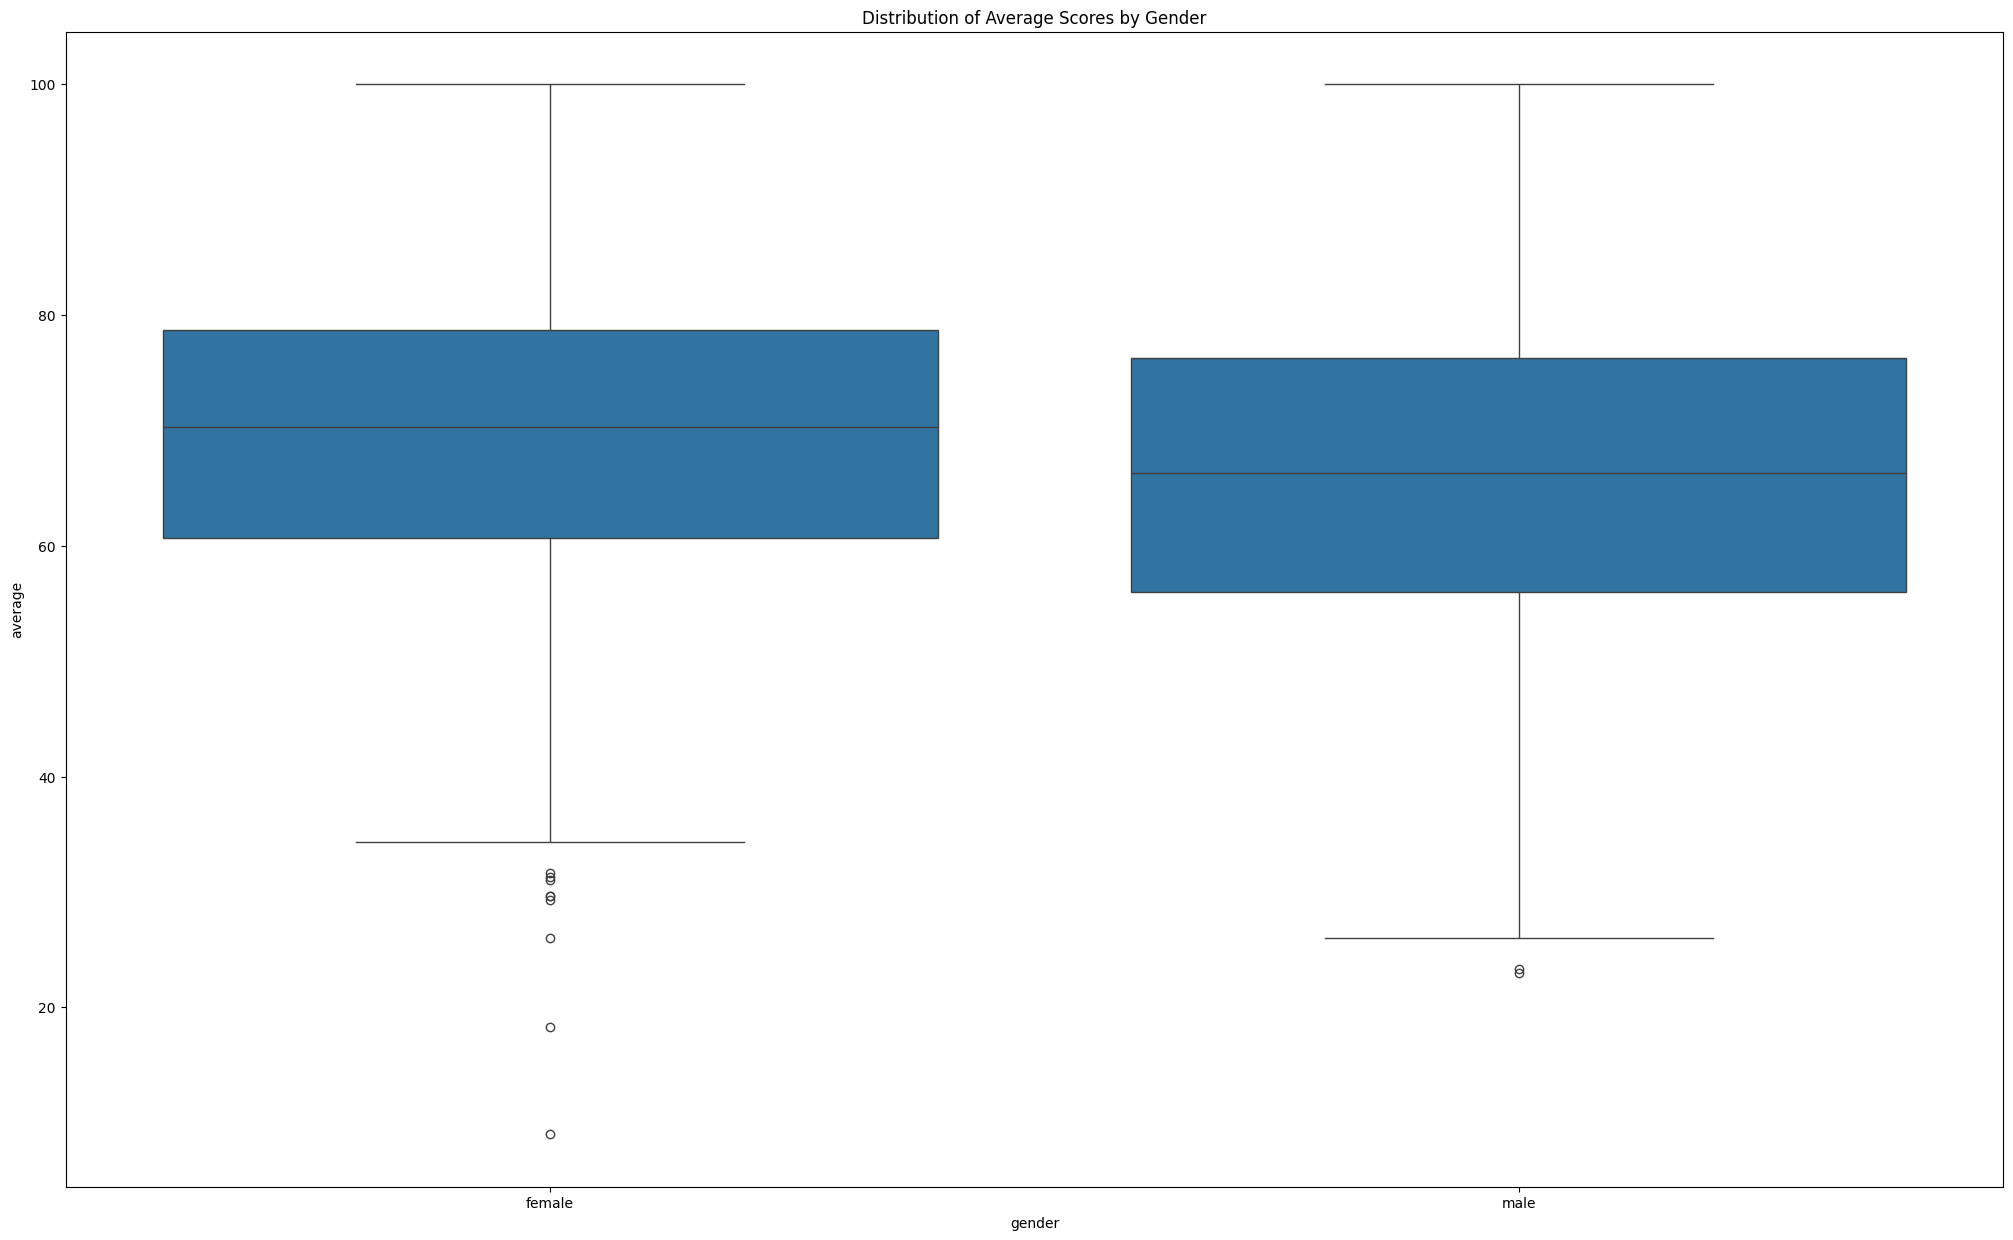

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'gender' and 'average'
sns.boxplot(x='gender', y='average', data=df)
plt.title("Distribution of Average Scores by Gender")
plt.show()


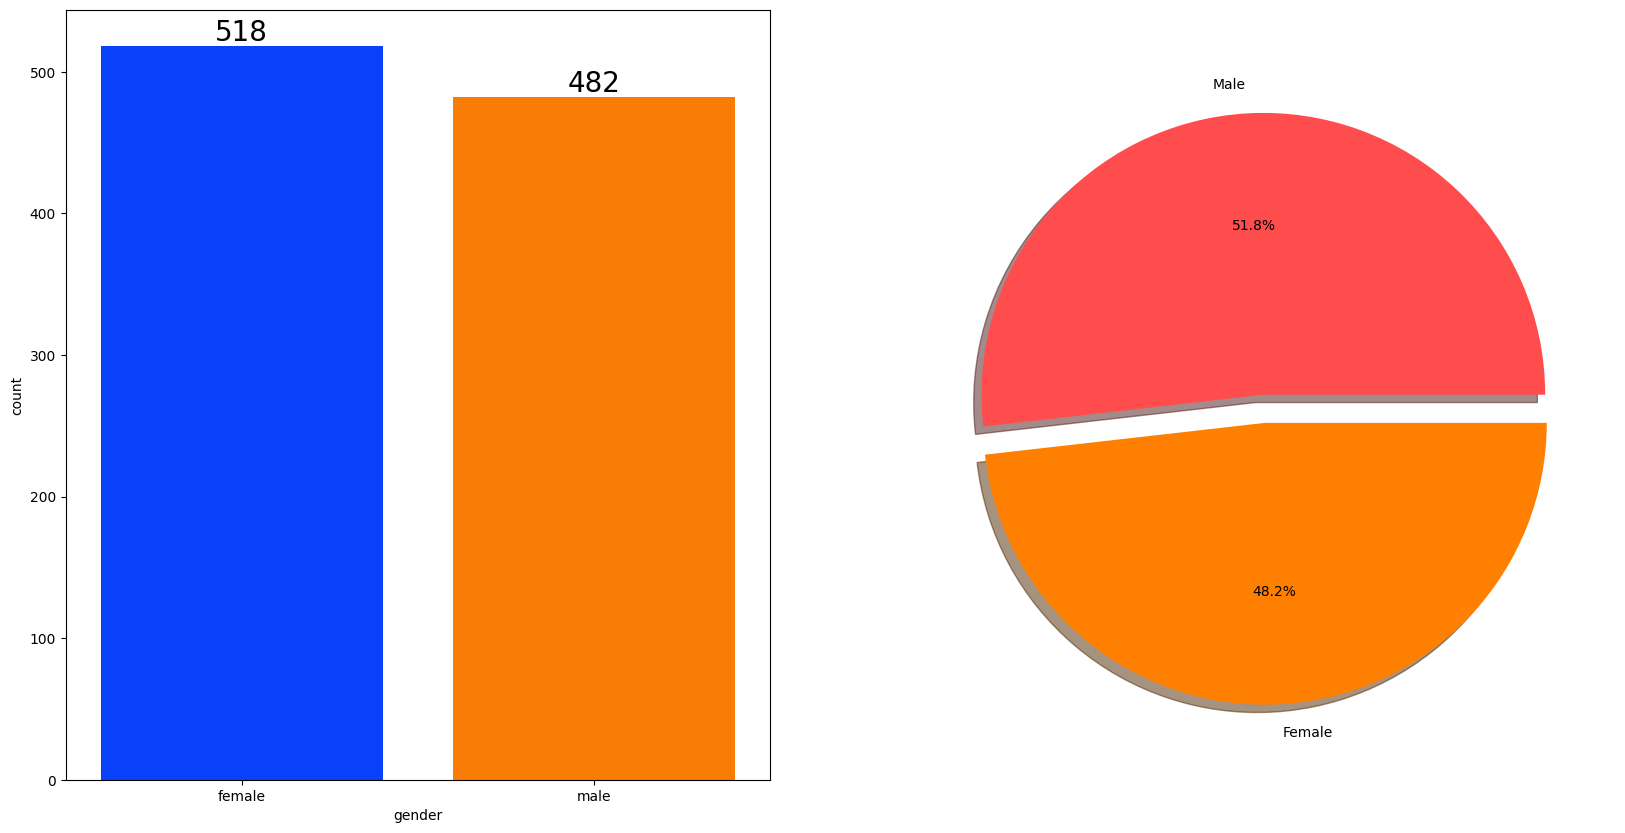

In [118]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [120]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [150]:
numeric_columns = df.select_dtypes(include='number')
gender_group_means = df.groupby('gender')[numeric_columns.columns].mean()
gender_group_means


,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


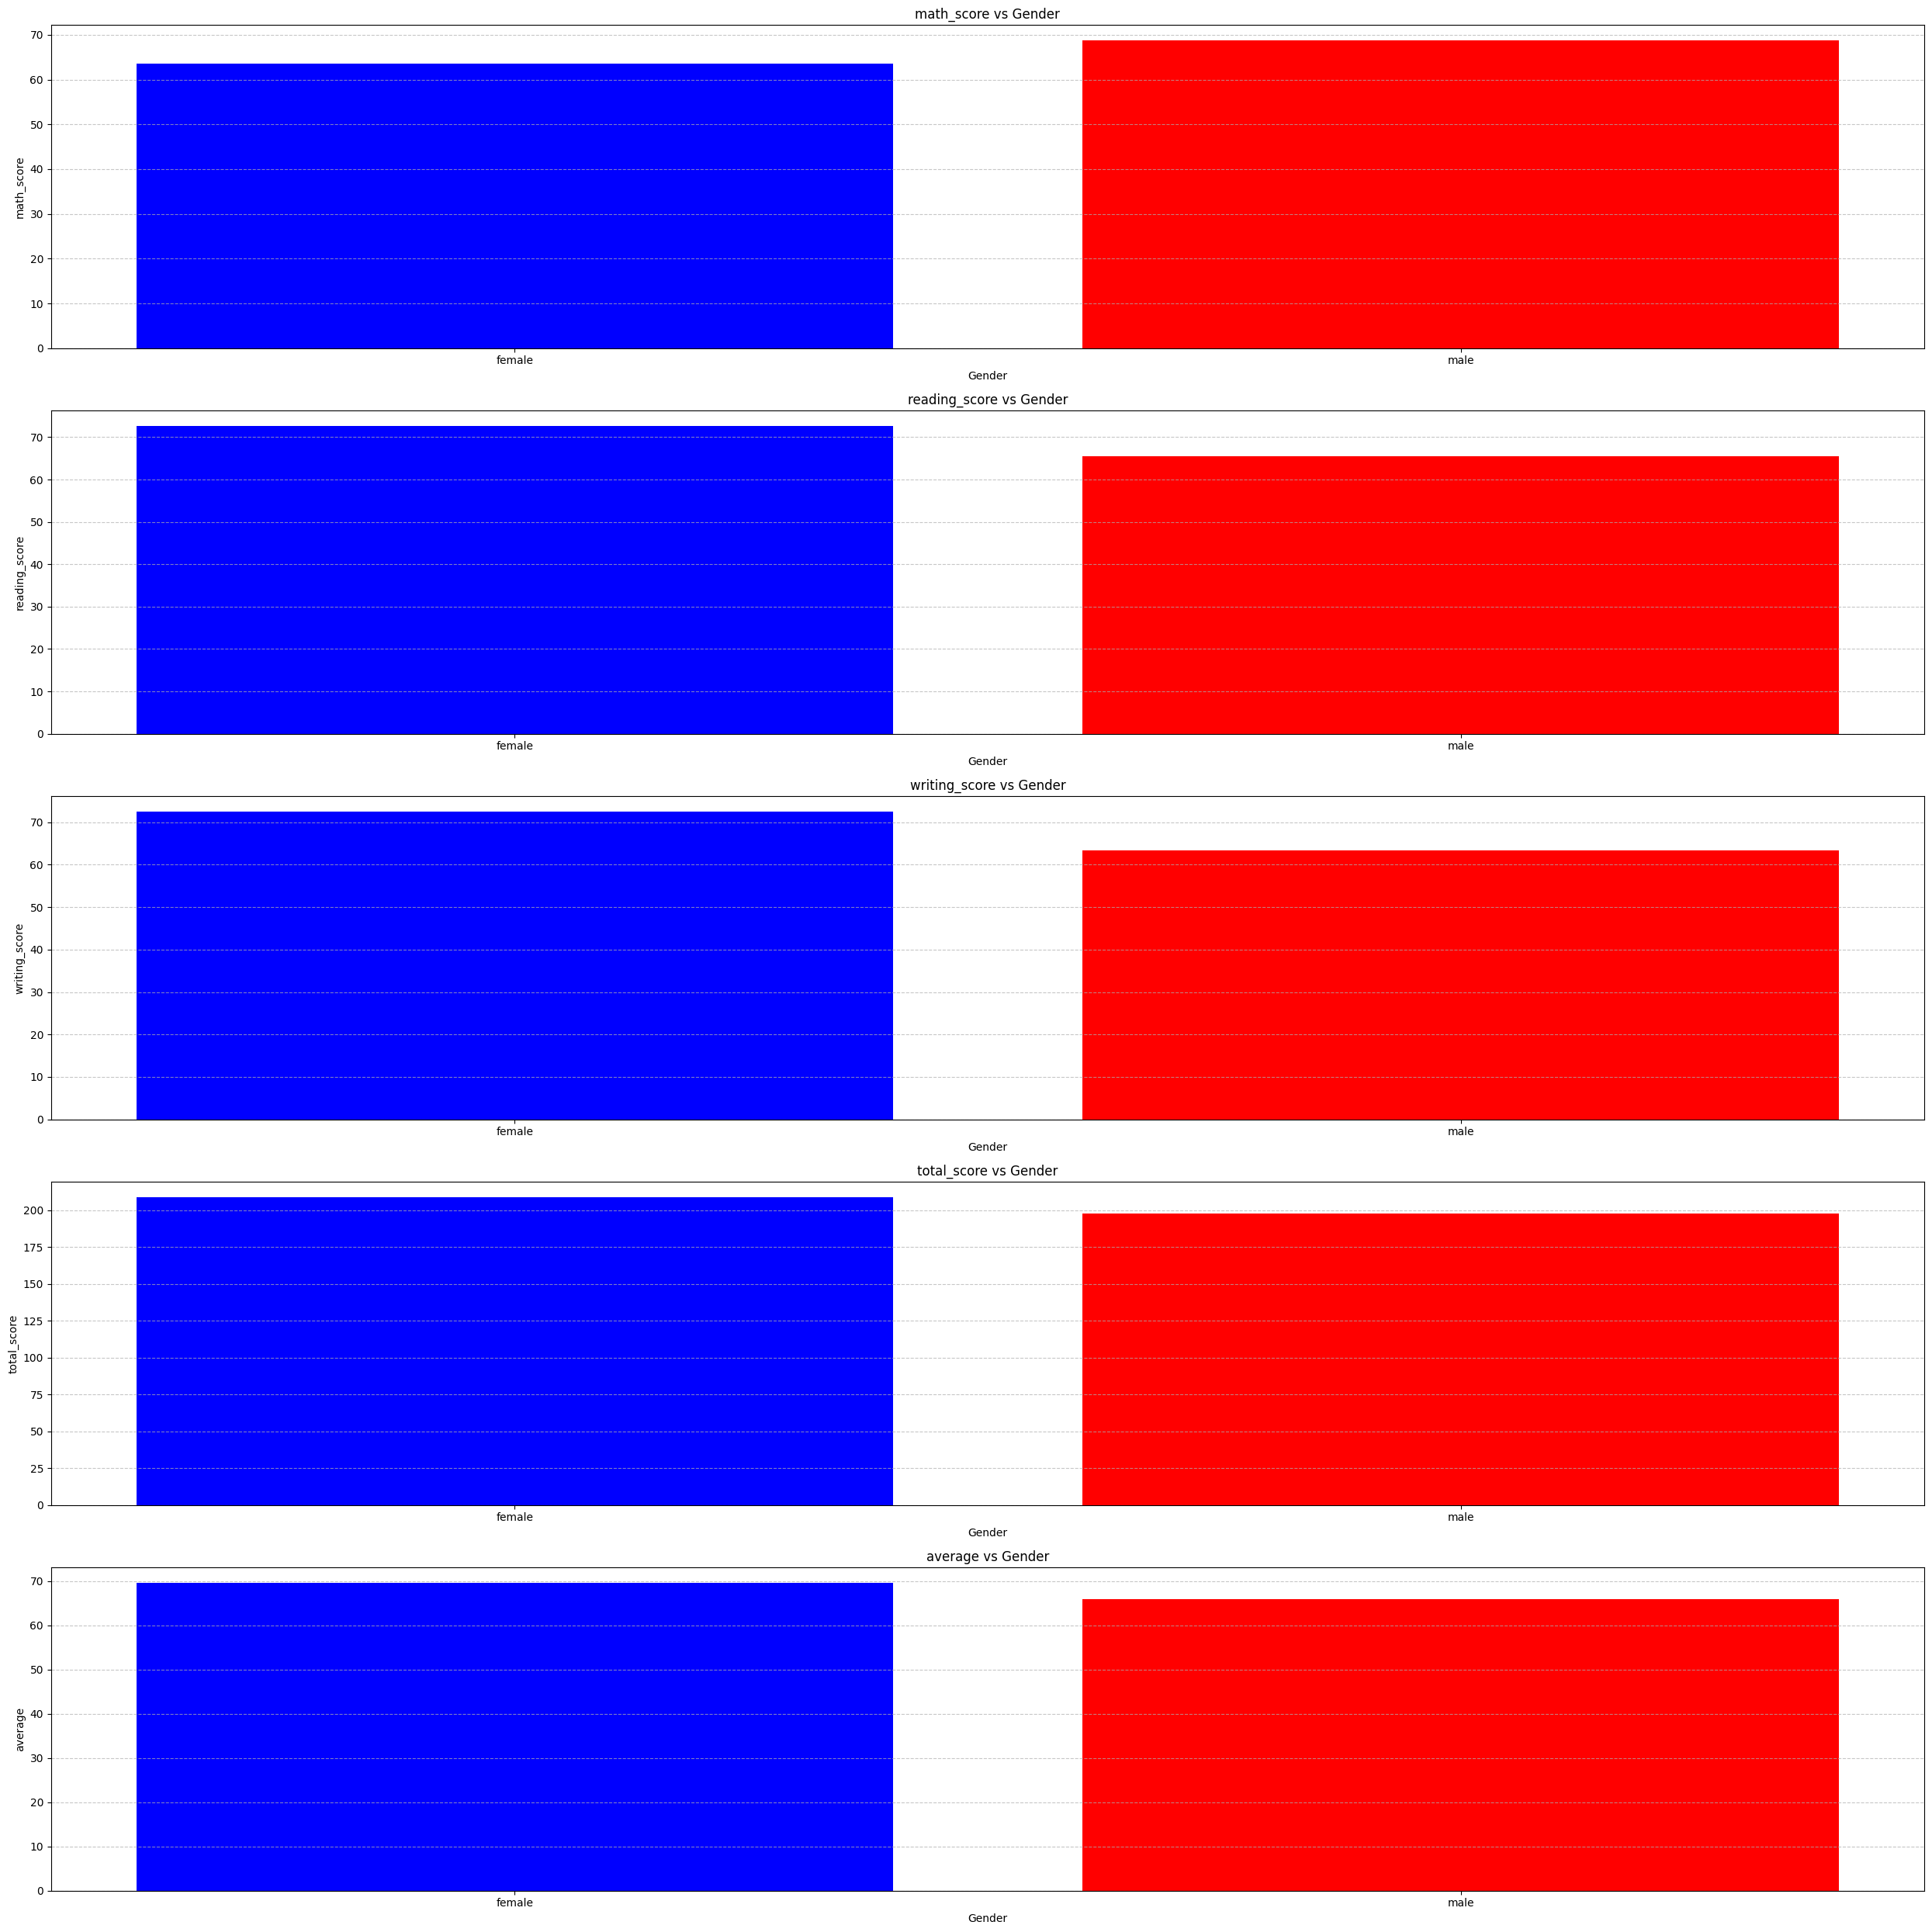

In [159]:
numeric_columns = gender_group_means.columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(25,25))

# Plot individual graphs for each column
for i, column in enumerate(numeric_columns):
    axes[i].bar(gender_group_means.index, gender_group_means[column], color=['blue', 'Red'])
    axes[i].set_title(f'{column} vs Gender')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(column)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [179]:
numeric_columns = df.select_dtypes(include='number')
race_group_means = df.groupby('race_ethnicity')[numeric_columns.columns].mean()
race_group_means


,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


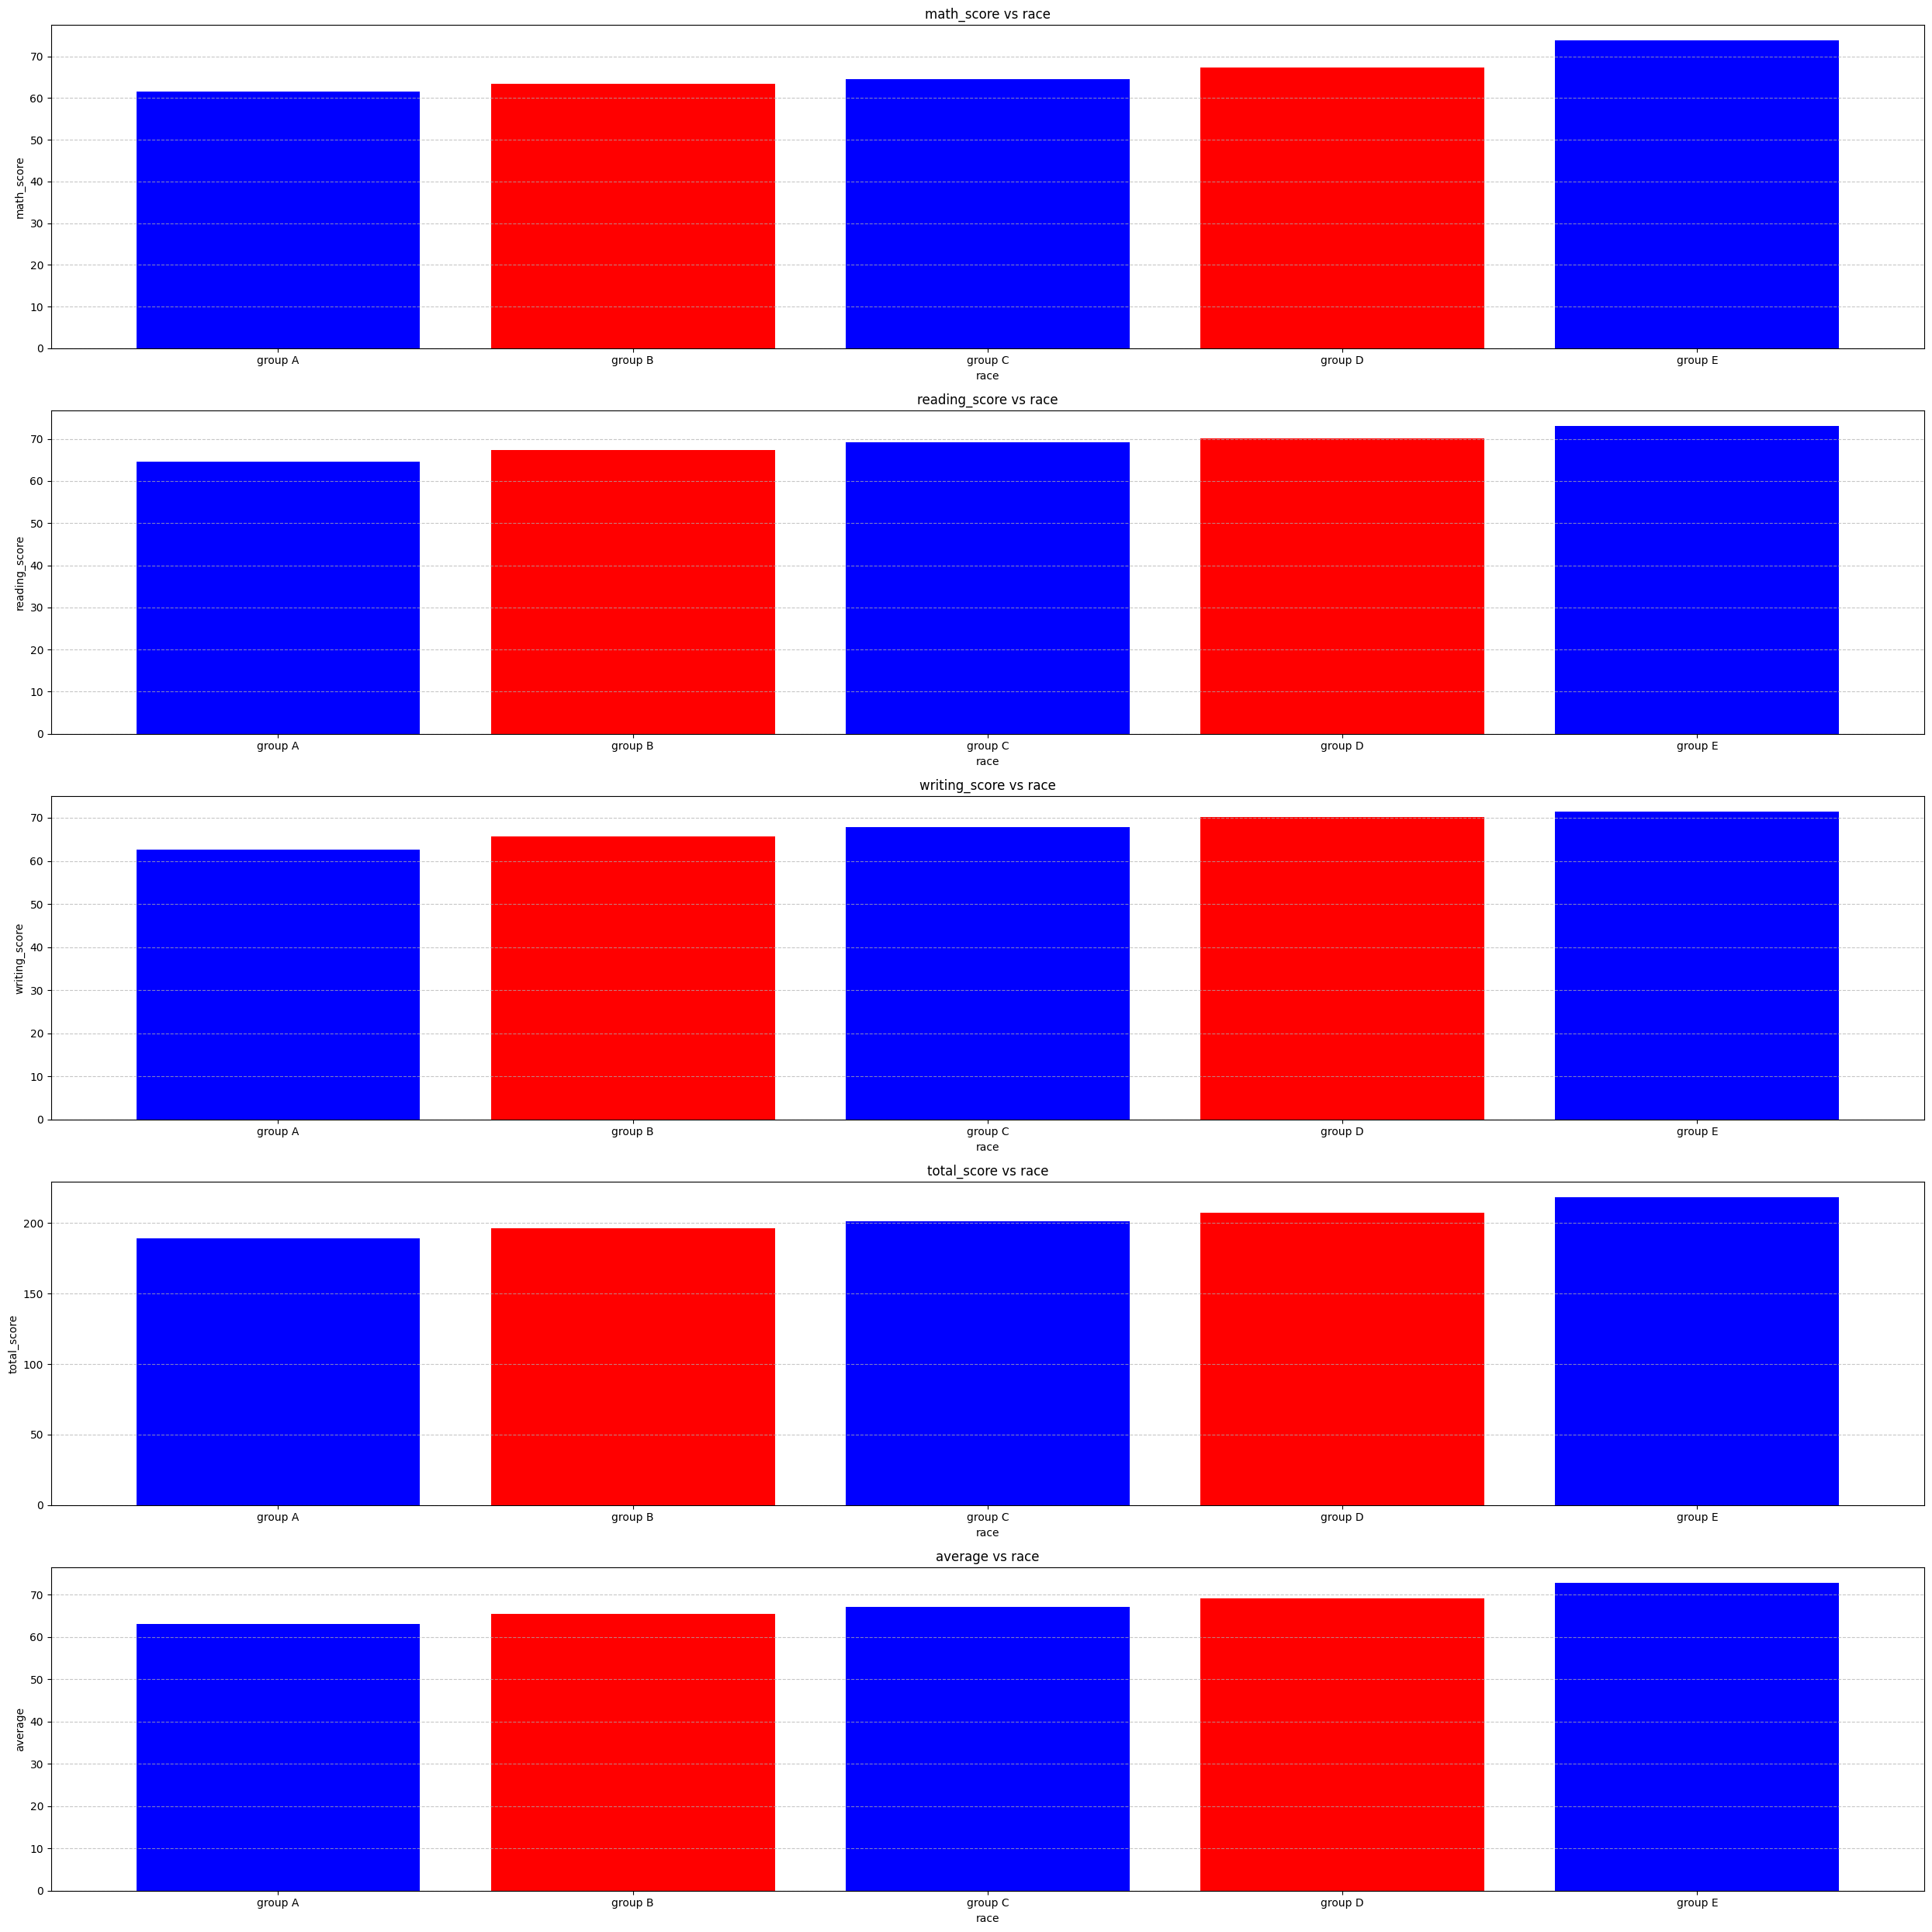

In [180]:
numeric_columns = race_group_means.columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(25,25))

# Plot individual graphs for each column
for i, column in enumerate(numeric_columns):
    axes[i].bar(race_group_means.index, race_group_means[column], color=['blue', 'Red'])
    axes[i].set_title(f'{column} vs race')
    axes[i].set_xlabel('race')
    axes[i].set_ylabel(column)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [167]:
numeric_columns = df.select_dtypes(include='number')
parent_group_means = df.groupby('parental_level_of_education')[numeric_columns.columns].mean()
parent_group_means


,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


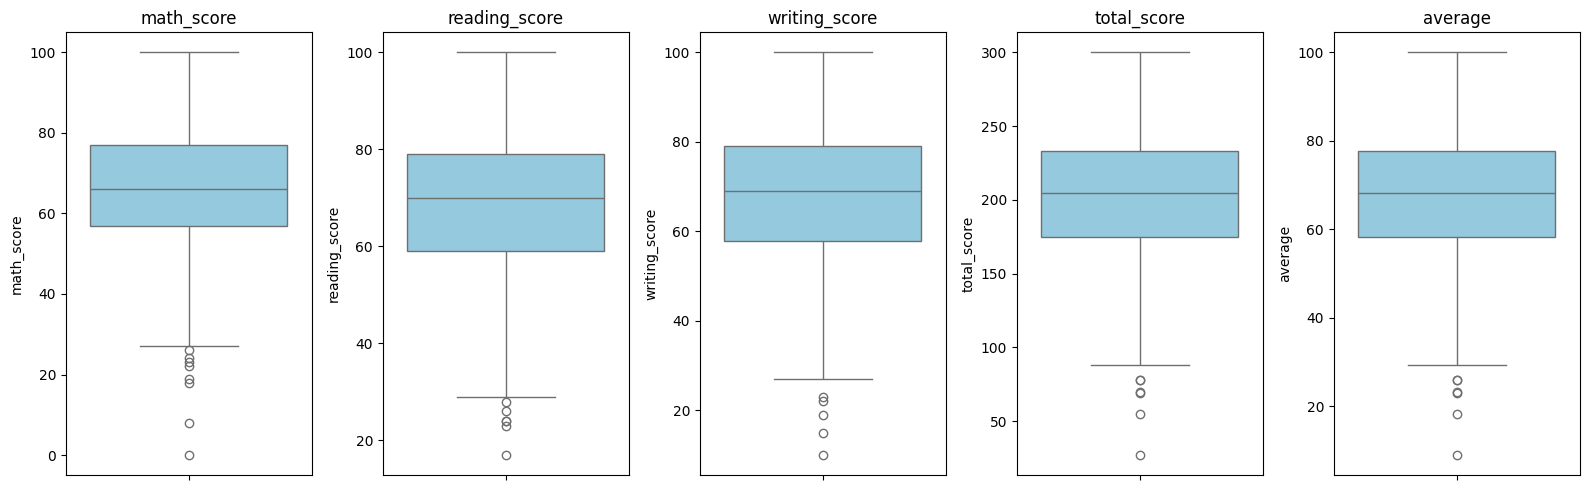

In [187]:
# Select numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Set up the matplotlib figure
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(16, 5))

# Sample a subset of your data (adjust the sample size as needed)
sample_size = min(1000, len(df))  # Choose an appropriate sample size
sampled_data = df.sample(sample_size, random_state=42)

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(sampled_data[column], color='skyblue', ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()